# New sampling

In [1]:
import torch
import numpy as np
from diffusion_utils_v2 import *
from torch.utils.data import DataLoader
from model2 import UNETv7, UNETv6
from tqdm import tqdm

In [2]:
# Define beta schedule
T = 100
# Pre-calculate different terms for closed form
beta, gamma = linear_beta_schedule(timesteps=T, start=0.0001*5, end=0.02*5)

BATCH_SIZE = 1
data = load_transformed_dataset()
dataloader = DataLoader(data, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)

x_sample, y_sample = next(iter(dataloader))

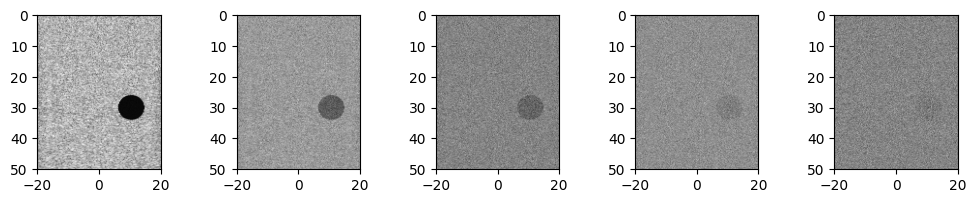

In [3]:
# Simulate forward diffusion
num_images = 5
stepsize = int(T/num_images)
plt.figure(figsize=(15,2))
for idx in range(0, T, stepsize):
    t = torch.Tensor([idx]).type(torch.int64)
    plt.subplot(1, num_images+1, int(idx/stepsize) + 1)
    img, noise = forward_diffusion_sample(y_sample, t, gamma)
    show_tensor_image(img)
plt.show()

## Not residual network

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else torch.device('cpu'))
y_shape = list(x_sample.shape)
y_shape[1] = 1
seed = torch.randn(y_shape, device=device)

### 60 epochs

Num params:  34278401


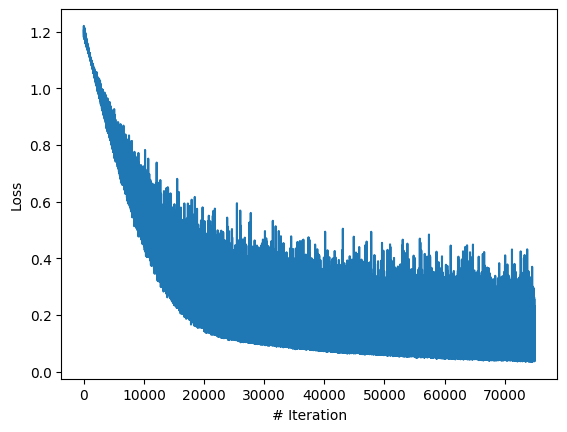

In [5]:
save_dir = r'.\weights_v6'
training_epochs = 60
model = UNETv6(in_channels=3, out_channels=1).to(device)
model.load_state_dict(torch.load(f"{save_dir}\\model_{training_epochs}.pth", map_location=device))
print("Num params: ", sum(p.numel() for p in model.parameters()))

loss_npy = np.load(f"{save_dir}\\loss_{training_epochs}.npy")
plt.plot(loss_npy[1:])
plt.xlabel('# Iteration')
plt.ylabel('Loss')
plt.show()

100%|██████████| 99/99 [01:00<00:00,  1.63it/s]


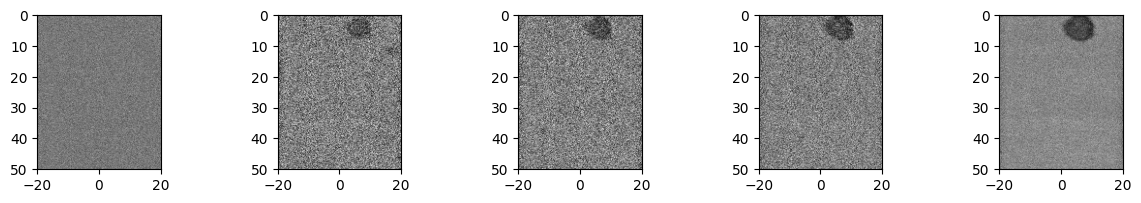

In [6]:
y_gen, intermediate = sample_image_cond(x_sample, model, beta)
show_reverse_process(intermediate)

### 200 epochs

Num params:  34278401


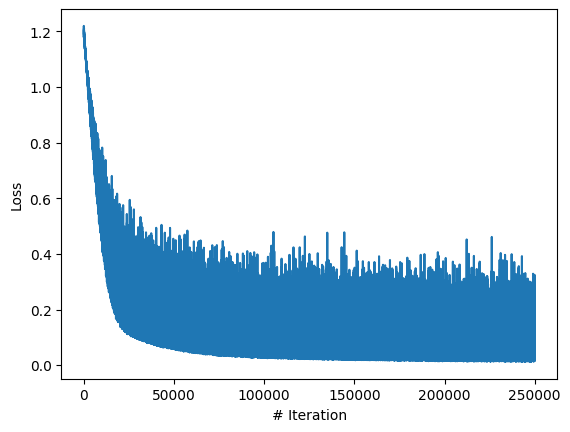

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else torch.device('cpu'))
save_dir = r'.\weights_v6'
training_epochs = 200
model = UNETv6(in_channels=3, out_channels=1).to(device)
model.load_state_dict(torch.load(f"{save_dir}\\model_{training_epochs}.pth", map_location=device))
print("Num params: ", sum(p.numel() for p in model.parameters()))

loss_npy = np.load(f"{save_dir}\\loss_{training_epochs}.npy")
plt.plot(loss_npy[1:])
plt.xlabel('# Iteration')
plt.ylabel('Loss')
plt.show()

100%|██████████| 99/99 [01:01<00:00,  1.60it/s]


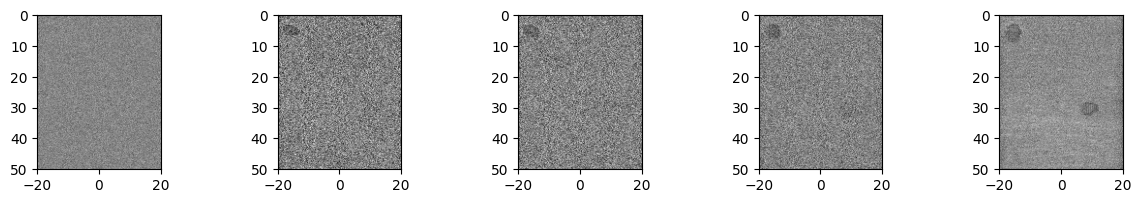

In [8]:
y_gen, intermediate = sample_image_cond(x_sample, model, beta)
show_reverse_process(intermediate)

## Residual network

### 60 epochs

Num params:  34278401


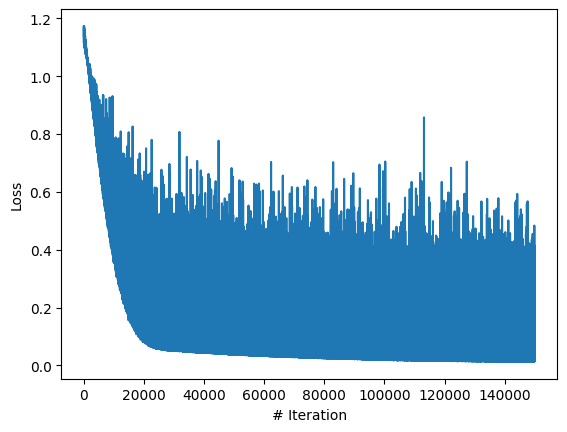

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else torch.device('cpu'))
save_dir = r'.\weights_v7'
training_epochs = 60
model = UNETv7(in_channels=3, out_channels=1).to(device)
model.load_state_dict(torch.load(f"{save_dir}\\model_{training_epochs}.pth", map_location=device))
print("Num params: ", sum(p.numel() for p in model.parameters()))

loss_npy = np.load(f"{save_dir}\\loss_{training_epochs}.npy")
plt.plot(loss_npy[1:])
plt.xlabel('# Iteration')
plt.ylabel('Loss')
plt.show()

100%|██████████| 99/99 [01:11<00:00,  1.38it/s]


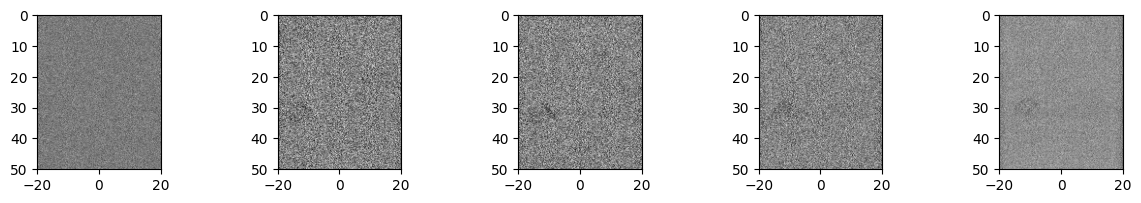

In [10]:
y_gen, intermediate = sample_image_cond(x_sample, model, beta)
show_reverse_process(intermediate)

### 200 epochs

Num params:  34278401


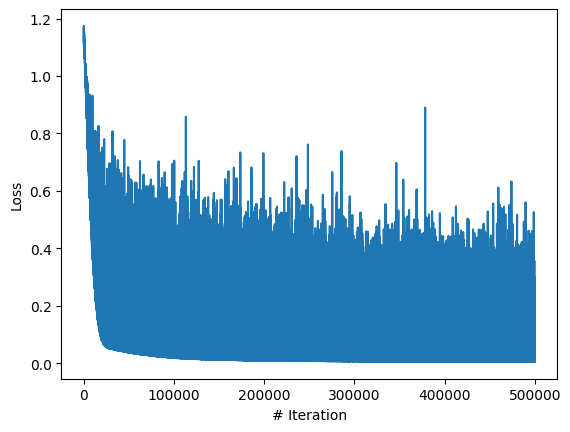

In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else torch.device('cpu'))
save_dir = r'.\weights_v7'
training_epochs = 200
model = UNETv7(in_channels=3, out_channels=1).to(device)
model.load_state_dict(torch.load(f"{save_dir}\\model_{training_epochs}.pth", map_location=device))
print("Num params: ", sum(p.numel() for p in model.parameters()))

loss_npy = np.load(f"{save_dir}\\loss_{training_epochs}.npy")
plt.plot(loss_npy[1:])
plt.xlabel('# Iteration')
plt.ylabel('Loss')
plt.show()

100%|██████████| 99/99 [01:12<00:00,  1.37it/s]


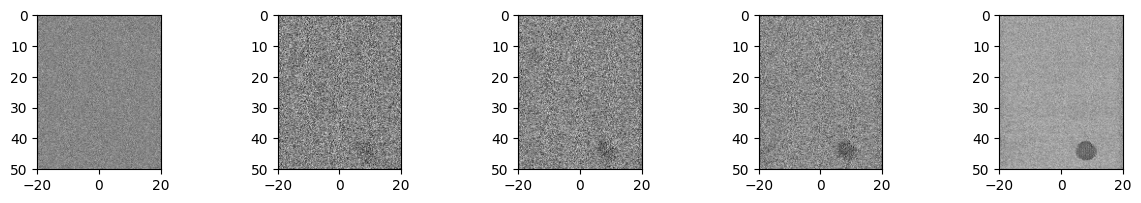

In [12]:
y_gen, intermediate = sample_image_cond(x_sample, model, beta)
show_reverse_process(intermediate)

# New schedule

In [13]:
# Define beta schedule
T = 100
# Pre-calculate different terms for closed form
beta, gamma = linear_beta_schedule(timesteps=T, start=1e-4, end=0.3)

BATCH_SIZE = 1
data = load_transformed_dataset()
dataloader = DataLoader(data, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)

x_sample, y_sample = next(iter(dataloader))

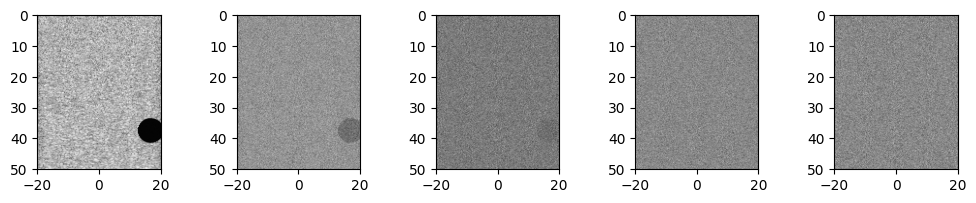

In [14]:
# Simulate forward diffusion
num_images = 5
stepsize = int(T/num_images)
plt.figure(figsize=(15,2))
for idx in range(0, T, stepsize):
    t = torch.Tensor([idx]).type(torch.int64)
    plt.subplot(1, num_images+1, int(idx/stepsize) + 1)
    img, noise = forward_diffusion_sample(y_sample, t, gamma)
    show_tensor_image(img)
plt.show()

### 40 epochs

Num params:  32531617


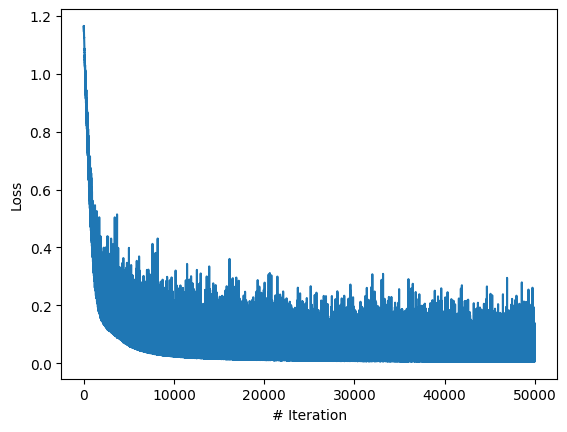

In [15]:
from model3 import UNETv8
device = torch.device("cuda:0" if torch.cuda.is_available() else torch.device('cpu'))
save_dir = r'.\weights_v8'
training_epochs = 40
model = UNETv8(in_channels=3, out_channels=1).to(device)
model.load_state_dict(torch.load(f"{save_dir}\\model_{training_epochs}.pth", map_location=device))
print("Num params: ", sum(p.numel() for p in model.parameters()))

loss_npy = np.load(f"{save_dir}\\loss_{training_epochs}.npy")
plt.plot(loss_npy)
plt.xlabel('# Iteration')
plt.ylabel('Loss')
plt.show()


100%|██████████| 99/99 [01:02<00:00,  1.59it/s]


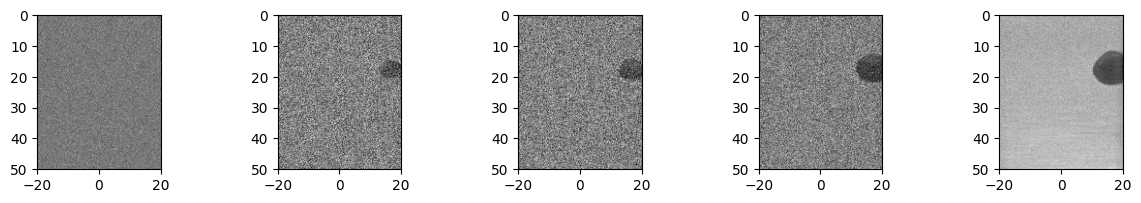

In [16]:
y_gen, intermediate = sample_image_cond(x_sample, model, beta)
show_reverse_process(intermediate)